%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%
% Calculation of Dehnen profiles S(\eta) and n(\beta)
% 
% \rho = \rho_0 r^{-\gamma} (1 + r/a)^{4-\gamma}
%
% \Sigma(R) = 2\int_0^\infty dz \rho(r)  = 
%           = 2\rho_0 a^{1-\gamma} S(R/a)
%
% S(\eta) = \int_0^\infty d\zeta x^{-\gamma} (1+x)^{\gamma-4}
%
% x = (\zeta^2 + \eta^2)^{1/2}
%
% eta = R/a
%
% M(b) = 2 \pi \int_0^b dR R \Sigma(R) = 
%      = 4 \pi \rho_0 a^{3-\gamma} n(\beta)
%
% \beta = b/a
%
% n(\beta) = \int_0^\beta d\eta \eta S(\eta)
%
%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [11]:
S = pd.read_csv(r'../Data/dehnen_s.dat', delimiter='\s+')
N = pd.read_csv(r'../Data/dehnen_n.dat', delimiter='\s+')

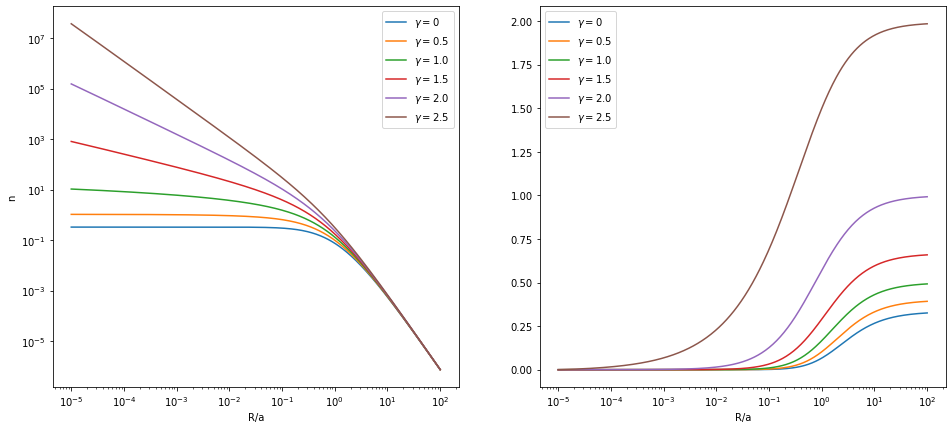

In [28]:
fig = plt.figure(figsize=(16,7))
spec = gridspec.GridSpec(ncols=2, nrows=1)

### figure 0: S(\eta)

ax0 = fig.add_subplot(spec[0])

ax0.plot(S['eta'], S['gamma=0'],   label='$\gamma=0$')
ax0.plot(S['eta'], S['gamma=0.5'], label='$\gamma=0.5$')
ax0.plot(S['eta'], S['gamma=1.0'], label='$\gamma=1.0$')
ax0.plot(S['eta'], S['gamma=1.5'], label='$\gamma=1.5$')
ax0.plot(S['eta'], S['gamma=2.0'], label='$\gamma=2.0$')
ax0.plot(S['eta'], S['gamma=2.5'], label='$\gamma=2.5$')

ax0.set_xscale('log')
ax0.set_yscale('log')

ax0.set_xlabel('R/a')
ax0.set_ylabel('S')

ax0.legend()


### figure 1: n(\eta)

ax1 = fig.add_subplot(spec[1])

ax1.plot(N['eta'], N['gamma=0'],   label='$\gamma=0$')
ax1.plot(N['eta'], N['gamma=0.5'], label='$\gamma=0.5$')
ax1.plot(N['eta'], N['gamma=1.0'], label='$\gamma=1.0$')
ax1.plot(N['eta'], N['gamma=1.5'], label='$\gamma=1.5$')
ax1.plot(N['eta'], N['gamma=2.0'], label='$\gamma=2.0$')
ax1.plot(N['eta'], N['gamma=2.5'], label='$\gamma=2.5$')

ax1.set_xscale('log')

ax1.set_xlabel('R/a')
ax0.set_ylabel('n')

ax1.legend()

                